# Coding Challenge
# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 15 years ago. So if today is 2024.05.17 then the weather we want to forecast is for the date 2009.05.18. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

# Setp by step guide

# 1. Load Extensions and Install Libraries

In [1]:
#This loads the BigQuery extension for Jupyter, to use the command %%bigquery
%load_ext google.cloud.bigquery

In [2]:
# Loads client library for Python
!pip install google-cloud-bigquery
!pip install google-cloud-bigquery-storage pyarrow
!pip install db-dtypes

# 2. Authentication and Configuration

In [3]:
#To authenticates application default credentials.
!gcloud auth application-default login
#Set default project for gcloud CLI
!gcloud config set project learning-codingchallenge


Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=0oDypWwGG7ePZErxu3VCQqiIYTuoEk&access_type=offline&code_challenge=QGjWiC0FtpW4z4rQBnQr-yxRBHUxOngm53iohJFRjQY&code_challenge_method=S256


Credentials saved to file: [/Users/yumnaiqbal/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "learning-codingchallenge" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning the resource.
Updated property [core/project].


# 3. Importing Libraries
   - Import necessary libraries for data manipulation and machine learning modelling.

In [5]:
import os
import pandas as pd
from google.cloud import bigquery
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import datetime as dt


# 4. Set the environment variable

In [6]:

project_id = "learning-codingchallenge"
os.environ["GOOGLE_CLOUD_PROJECT"] = project_id

# 5. BigQuery client setup

In [7]:

client = bigquery.Client()

In [8]:
%%bigquery 
SELECT
*
FROM `bigquery-public-data.samples.gsod`
LIMIT 20

/Users/yumnaiqbal/Desktop/7learning/code-challenges/datascience/7learning_challenge/venv/lib/python3.11/site-packages/google/cloud/bigquery/job/query.py:2051: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
/Users/yumnaiqbal/Desktop/7learning/code-challenges/datascience/7learning_challenge/venv/lib/python3.11/site-packages/google/cloud/bigquery/table.py:2379: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,30050,99999,1929,12,28,40.000000,4,35.000000,4,990.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
1,30910,99999,1929,10,27,39.000000,4,NaN,<NA>,NaN,...,NaN,<NA>,0.08,NaN,False,False,False,False,False,False
2,31590,99999,1929,11,14,36.000000,4,33.500000,4,999.299988,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,38640,99999,1929,10,11,58.500000,4,53.299999,4,1025.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,37950,99999,1929,10,12,53.500000,4,49.000000,4,1028.000000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,38640,99999,1929,12,9,49.000000,4,40.500000,4,998.900024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,34970,99999,1929,8,16,61.000000,4,54.700001,4,1015.000000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
7,37950,99999,1929,11,17,39.000000,4,34.700001,4,1005.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
8,37950,99999,1929,8,6,57.000000,4,55.299999,4,1010.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
9,39800,99999,1929,11,1,51.000000,4,49.799999,4,1023.799988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False


# 6. Data Processing
- Handle missing values and prepare data for training.

In [9]:
#checking columns names in dataset
table_ref = client.dataset('samples', project='bigquery-public-data').table('gsod')
table = client.get_table(table_ref)
print("Columns in table {}: ".format(table_ref.table_id))
for column in table.schema:
    print(column.name)

Columns in table gsod: 
station_number
wban_number
year
month
day
mean_temp
num_mean_temp_samples
mean_dew_point
num_mean_dew_point_samples
mean_sealevel_pressure
num_mean_sealevel_pressure_samples
mean_station_pressure
num_mean_station_pressure_samples
mean_visibility
num_mean_visibility_samples
mean_wind_speed
num_mean_wind_speed_samples
max_sustained_wind_speed
max_gust_wind_speed
max_temperature
max_temperature_explicit
min_temperature
min_temperature_explicit
total_precipitation
snow_depth
fog
rain
snow
hail
thunder
tornado


In [10]:
# list all columns and datatypes from dataset
table_ref = client.dataset('samples', project='bigquery-public-data').table('gsod')

table = client.get_table(table_ref)

print("Columns in table {}: ".format(table_ref.table_id))
for column in table.schema:
    print("{}:{}".format(column.name,column.field_type))

Columns in table gsod: 
station_number:INTEGER
wban_number:INTEGER
year:INTEGER
month:INTEGER
day:INTEGER
mean_temp:FLOAT
num_mean_temp_samples:INTEGER
mean_dew_point:FLOAT
num_mean_dew_point_samples:INTEGER
mean_sealevel_pressure:FLOAT
num_mean_sealevel_pressure_samples:INTEGER
mean_station_pressure:FLOAT
num_mean_station_pressure_samples:INTEGER
mean_visibility:FLOAT
num_mean_visibility_samples:INTEGER
mean_wind_speed:FLOAT
num_mean_wind_speed_samples:INTEGER
max_sustained_wind_speed:FLOAT
max_gust_wind_speed:FLOAT
max_temperature:FLOAT
max_temperature_explicit:BOOLEAN
min_temperature:FLOAT
min_temperature_explicit:BOOLEAN
total_precipitation:FLOAT
snow_depth:FLOAT
fog:BOOLEAN
rain:BOOLEAN
snow:BOOLEAN
hail:BOOLEAN
thunder:BOOLEAN
tornado:BOOLEAN


## Part 1 
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010.



In [29]:
#Task 1: Fetch as required and format data
def fetch_weather_data():
    client = bigquery.Client()
    query = """
        SELECT 
          FORMAT_DATE('%Y-%m-%d', DATE(CONCAT(year,'-', month, '-', day))) AS date,
          *
        FROM 
          `bigquery-public-data.samples.gsod`
        WHERE 
          year BETWEEN 2005 AND 2009
          AND station_number BETWEEN 725300 AND 726300
        """
    df = client.query(query).to_dataframe()
    return df



In [30]:
weather_data_df = fetch_weather_data()
weather_data_df

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005-11-01,725464,99999,2005,11,1,61.200001,4,28.000000,4,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
1,2005-07-27,725869,99999,2005,7,27,67.599998,4,39.700001,4,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
2,2005-12-12,725940,99999,2005,12,12,47.200001,4,41.299999,4,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,2005-03-05,725940,99999,2005,3,5,50.400002,4,46.000000,4,...,NaN,<NA>,0.14,NaN,False,False,False,False,False,False
4,2005-09-24,725525,99999,2005,9,24,85.099998,4,61.700001,4,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377779,2009-11-11,725300,94846,2009,11,11,44.900002,24,33.799999,24,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377780,2009-09-03,725760,24021,2009,9,3,70.300003,24,35.000000,24,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377781,2009-04-21,725825,24121,2009,4,21,55.599998,24,29.600000,24,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
377782,2009-05-03,725342,13809,2009,5,3,61.000000,24,47.599998,24,...,NaN,<NA>,0.03,NaN,False,False,False,False,False,False


In [31]:
# drop date columns 
weather_data_df = weather_data_df.drop(columns=['year', 'month', 'day'])
# sort by date
weather_data_df = weather_data_df.sort_values(by='date')
# reset index
weather_data_df.reset_index(drop=True, inplace=True)
print(weather_data_df.shape)
#df information
print(weather_data_df.dtypes)

(377784, 29)
date                                   object
station_number                          Int64
wban_number                             Int64
mean_temp                             float64
num_mean_temp_samples                   Int64
mean_dew_point                        float64
num_mean_dew_point_samples              Int64
mean_sealevel_pressure                float64
num_mean_sealevel_pressure_samples      Int64
mean_station_pressure                 float64
num_mean_station_pressure_samples       Int64
mean_visibility                       float64
num_mean_visibility_samples             Int64
mean_wind_speed                       float64
num_mean_wind_speed_samples             Int64
max_sustained_wind_speed              float64
max_gust_wind_speed                   float64
max_temperature                       float64
max_temperature_explicit              boolean
min_temperature                       float64
min_temperature_explicit              boolean
total_precipitation  

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [32]:
#Filter data and perform initial analysis
filtered_df = weather_data_df[(weather_data_df['station_number'] >= 725300) & (weather_data_df['station_number'] <= 725330)]
filtered_df.reset_index(drop=True,inplace=True)
print(f"Filtered shape: {filtered_df.shape}")


Filtered shape: (18129, 29)


- Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [33]:
# Missing values
print("\nMissing values:\n", filtered_df.isnull().sum())

# Check for duplicates
duplicates = filtered_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Missing values:
 date                                      0
station_number                            0
wban_number                               0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            2
num_mean_dew_point_samples                2
mean_sealevel_pressure                 1838
num_mean_sealevel_pressure_samples     1838
mean_station_pressure                 17136
num_mean_station_pressure_samples     17136
mean_visibility                           3
num_mean_visibility_samples               3
mean_wind_speed                           5
num_mean_wind_speed_samples               5
max_sustained_wind_speed                 10
max_gust_wind_speed                    6661
max_temperature                           2
max_temperature_explicit                  2
min_temperature                       18129
min_temperature_explicit              18129
total_precipitation                     191
snow_depth    

In [34]:
# Drop columns with more than 50% missing values
cleaned_df = filtered_df.dropna(thresh=filtered_df.shape[0]*0.5, axis=1)



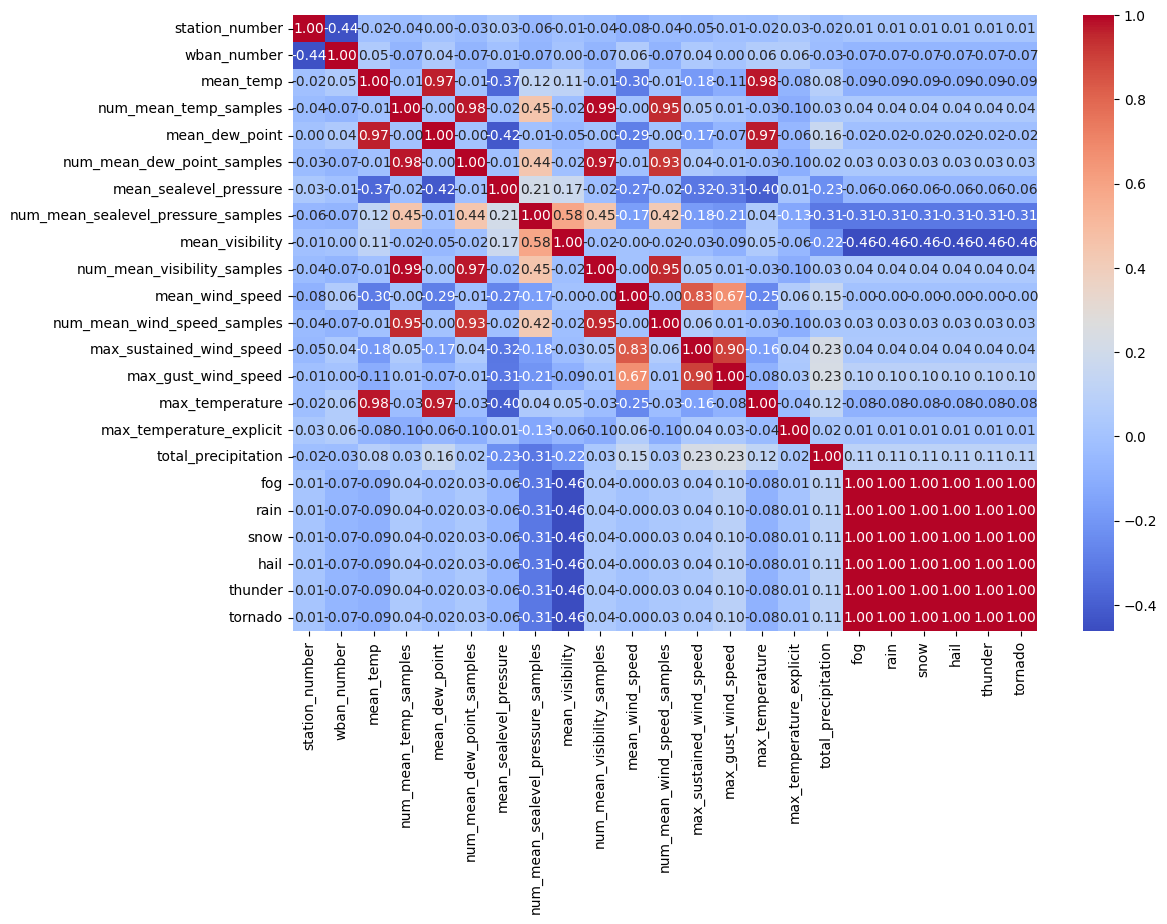

In [17]:
# Checking importance of feature
# Calculate correlation matrix
cleaned_df_no_date = cleaned_df.drop(columns=['date'])
corr_matrix = cleaned_df_no_date.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [35]:
#Drop irrelevant or highly missing features.
columns_to_drop = ['wban_number', 'num_mean_temp_samples', 'num_mean_dew_point_samples',
                   'num_mean_sealevel_pressure_samples', 'num_mean_visibility_samples',
                   'num_mean_wind_speed_samples','max_temperature_explicit',
                   'max_sustained_wind_speed', 'max_gust_wind_speed']
cleaned_df = cleaned_df.drop(columns=columns_to_drop)


In [36]:
 # Drop variables that have a correlation of 1.00 with outcome variable 'snow'might be redundant causing multicollinearity issues
columns_to_drop = [
    'fog',
    'hail',
    'thunder',
    'tornado',
    'rain'
]

cleaned_df = cleaned_df.drop(columns=columns_to_drop)

In [37]:
# Checking data types
print(cleaned_df.dtypes)

date                       object
station_number              Int64
mean_temp                 float64
mean_dew_point            float64
mean_sealevel_pressure    float64
mean_visibility           float64
mean_wind_speed           float64
max_temperature           float64
total_precipitation       float64
snow                      boolean
dtype: object


In [38]:
# Further handling of missing values by filling missing values with the mean of the column
numeric_cols = cleaned_df.select_dtypes(include=['number']).columns

cleaned_df[numeric_cols] = cleaned_df[numeric_cols].fillna(cleaned_df[numeric_cols].mean())

In [39]:
# Reset the index
cleaned_df.reset_index(drop=True, inplace=True)
# Summary statistics
print(cleaned_df.describe(include='all'))

              date  station_number     mean_temp  mean_dew_point  \
count        18129         18129.0  18129.000000    18129.000000   
unique        1824            <NA>           NaN             NaN   
top     2005-01-01            <NA>           NaN             NaN   
freq            10            <NA>           NaN             NaN   
mean           NaN    725316.96205     51.999636       41.605108   
std            NaN        8.979529     19.392603       18.493916   
min            NaN        725300.0    -16.200001      -23.500000   
25%            NaN        725314.0     36.299999       27.500000   
50%            NaN        725316.0     53.799999       42.599998   
75%            NaN        725326.0     69.099998       57.200001   
max            NaN        725330.0     92.000000       79.099998   

        mean_sealevel_pressure  mean_visibility  mean_wind_speed  \
count             18129.000000     18129.000000     18129.000000   
unique                     NaN              NaN

# 7. Feature Engineering

In [40]:
# Extracting features
cleaned_df['snowfall'] = cleaned_df['snow'].astype(int)
# Remove the redundant 'snow' column
cleaned_df.drop(columns=['snow'], inplace=True)
cleaned_df['day_of_year'] = pd.to_datetime(cleaned_df['date']).dt.dayofyear
cleaned_df['month'] = pd.to_datetime(cleaned_df['date']).dt.month
cleaned_df['is_winter'] = cleaned_df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)



### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

# 8. Spliting Data
- Split the data into training and testing sets.

In [41]:
cutoff_date=str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]
cutoff_date


'2009-06-24'

In [42]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

# Split data into test set (only the cutoff date) and pre_cutoff_data
test_df = cleaned_df[cleaned_df['date'] == cutoff_date]
pre_cutoff_data = cleaned_df[cleaned_df['date'] != cutoff_date]
# Initial stratified split to maintain class balance
train_set, temp_set = train_test_split(pre_cutoff_data, test_size=0.2, stratify=pre_cutoff_data['snowfall'], random_state=42)

# Further stratified split for evaluation and additional test data
eval_set, extra_test_set = train_test_split(temp_set, test_size=0.5, stratify=temp_set['snowfall'], random_state=42)

# Combine test data from the cutoff date with additional test data
test_df = pd.concat([test_df, extra_test_set])

print(f"Training set: {len(train_set)} records")
print(f"Evaluation set: {len(eval_set)} records")
print(f"Test set: {len(test_df)} records")


Training set: 14495 records
Evaluation set: 1812 records
Test set: 1822 records


## Part 2 of the test
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [ ]:
str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

# 9. Model Training and Evaluation

# Model-1 (Train Random Forest Classifier)
- Initialize and train a Random Forest model on the training data.

In [43]:
X_train = train_set.drop(['date', 'snowfall'], axis=1)
y_train = train_set['snowfall']
X_eval = eval_set.drop(['date', 'snowfall'], axis=1)
y_eval = eval_set['snowfall']
X_test = test_df.drop(['date', 'snowfall'], axis=1)
y_test = test_df['snowfall']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
pred_eval = rf_model.predict(X_eval)

pred_test = rf_model.predict(X_test)


accuracy_eval = accuracy_score(y_eval, pred_eval)
print("Random Forest Accuracy on evaluation data:", accuracy_eval)

accuracy_test = accuracy_score(y_test, pred_test)
print("Random Forest Accuracy on test data:", accuracy_test)

Random Forest Accuracy on evaluation data: 0.9111479028697572
Random Forest Accuracy on test data: 0.9072447859495061


In [44]:
# Predictions for the test set
y_test_pred = rf_model.predict(X_test)
test_predictions = test_df[['date', 'station_number']].copy()
test_predictions['predicted_snowfall'] = y_test_pred
print(test_predictions)


            date  station_number  predicted_snowfall
16242 2009-06-24          725320                   0
16243 2009-06-24          725314                   0
16244 2009-06-24          725300                   0
16245 2009-06-24          725315                   0
16246 2009-06-24          725316                   0
...          ...             ...                 ...
8916  2007-06-18          725326                   0
17004 2009-09-10          725317                   1
2718  2005-10-02          725314                   0
13099 2008-08-12          725300                   0
1889  2005-07-11          725316                   0

[1822 rows x 3 columns]


In [45]:
# Evaluation Metrics for Random Forest
print("Confusion Matrix (Evaluation):")
print(confusion_matrix(y_eval, pred_eval))
print("\nClassification Report (Evaluation):")
print(classification_report(y_eval, pred_eval))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report (Test):")
print(classification_report(y_test, pred_test))




Confusion Matrix (Evaluation):
[[1570   28]
 [ 133   81]]

Classification Report (Evaluation):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1598
           1       0.74      0.38      0.50       214

    accuracy                           0.91      1812
   macro avg       0.83      0.68      0.73      1812
weighted avg       0.90      0.91      0.90      1812


Confusion Matrix (Test):
[[1577   31]
 [ 138   76]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1608
           1       0.71      0.36      0.47       214

    accuracy                           0.91      1822
   macro avg       0.81      0.67      0.71      1822
weighted avg       0.89      0.91      0.89      1822



# Model-2 (Train Linear Regression Model)

In [48]:
lr_model = LogisticRegression(random_state=42,max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions for Logistic Regression
lr_pred_eval = lr_model.predict(X_eval)
lr_pred_test = lr_model.predict(X_test)

# Accuracy for Logistic Regression
lr_accuracy_eval = accuracy_score(y_eval, lr_pred_eval)
print("\nLogistic Regression Accuracy on evaluation data:", lr_accuracy_eval)
lr_accuracy_test = accuracy_score(y_test, lr_pred_test)
print("Logistic Regression Accuracy on test data:", lr_accuracy_test)



Logistic Regression Accuracy on evaluation data: 0.8956953642384106
Logistic Regression Accuracy on test data: 0.893523600439078


In [49]:
# Evaluation Metrics for Logistic Regression
print("Confusion Matrix (Evaluation):")
print(confusion_matrix(y_eval, lr_pred_eval))
print("\nClassification Report (Evaluation):")
print(classification_report(y_eval, lr_pred_eval))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, lr_pred_test))
print("\nClassification Report (Test):")
print(classification_report(y_test, lr_pred_test))

Confusion Matrix (Evaluation):
[[1568   30]
 [ 159   55]]

Classification Report (Evaluation):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1598
           1       0.65      0.26      0.37       214

    accuracy                           0.90      1812
   macro avg       0.78      0.62      0.66      1812
weighted avg       0.88      0.90      0.88      1812


Confusion Matrix (Test):
[[1577   31]
 [ 163   51]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1608
           1       0.62      0.24      0.34       214

    accuracy                           0.89      1822
   macro avg       0.76      0.61      0.64      1822
weighted avg       0.87      0.89      0.87      1822



In [52]:
specific_date = '2009-06-24'  
specific_station = 725316 

# Find the row corresponding to the specific date and station
specific_date_data = X_test[(test_df['date'] == specific_date) & (test_df['station_number'] == specific_station)]

if not specific_date_data.empty:
    specific_date_prediction = rf_model.predict(specific_date_data)
    print("\nPredicted snowfall on specific date:", specific_date_prediction[0])
else:
    print("\nNo data found for the specified date and station.")


Predicted snowfall on specific date: 0


# Conclusion

Final conclusion: The Random Forest classifier achieved an accuracy of 91.11% on evaluation data and 90.72% on test data, demonstrating strong performance in identifying both snowfall and non-snowfall days. In comparison, the Logistic Regression model had an accuracy of 89.57% on evaluation data and 89.35% on test data. Therefore, the Random Forest model outperformed the Logistic Regression model and is the recommended choice for predicting snowfall.